# Random forest MLA

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

# Load the data
student_file = os.path.join("..", "data", "processed", "Merged_Final_File_Updated.xlsx")
df = pd.read_excel(student_file)

# Encode the target variable
df['dropped out'] = df['dropped out'].map({'no': 0, 'yes': 1})

# Select features and target
features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade']
target = 'dropped out'

X = df[features]
y = df[target]

# Define a pipeline with scaling and Random Forest Classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('rf', RandomForestClassifier(n_estimators=60, random_state=42))  # Random Forest Classifier
])

# Define Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

# Split data into training and testing sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model on the training set
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Test Set Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Cross-Validation Accuracy Scores: [0.65671642 0.68656716 0.68656716 0.66666667 0.74242424]
Mean Accuracy: 0.69
Standard Deviation: 0.03

Final Test Set Accuracy: 0.66

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.56      0.63        36
           1       0.60      0.77      0.68        31

    accuracy                           0.66        67
   macro avg       0.67      0.66      0.66        67
weighted avg       0.68      0.66      0.65        67


Confusion Matrix:
[[20 16]
 [ 7 24]]


# Previous education

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

# Load the data
student_file = os.path.join("..", "data", "processed", "Merged_Final_File_Updated.xlsx")
df = pd.read_excel(student_file)

# Map dependent variable 'dropped out' to binary
df['dropped out'] = df['dropped out'].map({'no': 0, 'yes': 1})

# Define features and target
features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade', 'education_level']
target = 'dropped out'

X = df[features]
y = df[target]

# Define preprocessing for numerical and categorical features
numerical_features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade']
categorical_features = ['education_level']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=1)),  # Fill NA values with 1
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline with Random Forest Classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=60, random_state=42))
])

# Define Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

# Split data into training and testing sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model on the training set
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Test Set Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Cross-Validation Accuracy Scores: [0.73134328 0.71641791 0.70149254 0.74242424 0.74242424]
Mean Accuracy: 0.73
Standard Deviation: 0.02

Final Test Set Accuracy: 0.61

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.50      0.58        36
           1       0.56      0.74      0.64        31

    accuracy                           0.61        67
   macro avg       0.63      0.62      0.61        67
weighted avg       0.63      0.61      0.61        67


Confusion Matrix:
[[18 18]
 [ 8 23]]


# AUC - ROC

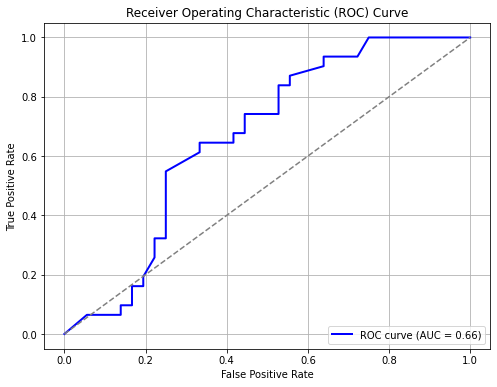

AUC: 0.66


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
import os
import matplotlib.pyplot as plt

# Load the data
student_file = os.path.join("..", "data", "processed", "Merged_Final_File_Updated.xlsx")
df = pd.read_excel(student_file)

# Map dependent variable 'dropped out' to binary
df['dropped out'] = df['dropped out'].map({'no': 0, 'yes': 1})

# Define features and target
features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade', 'education_level']
target = 'dropped out'

X = df[features]
y = df[target]

# Define preprocessing for numerical and categorical features
numerical_features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade']
categorical_features = ['education_level']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=1)),  # Fill NA values with 1
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline with Random Forest Classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=60, random_state=42))
])

# Split data into training and testing sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model on the training set
pipeline.fit(X_train, y_train)

# Predict probabilities for the test set (probabilities for the positive class, i.e., class 1)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC value
print(f"AUC: {auc:.2f}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

# Load the data
student_file = os.path.join("..", "data", "processed", "Merged_Final_File_Updated.xlsx")
df = pd.read_excel(student_file)

# Map dependent variable 'dropped out' to binary
df['dropped out'] = df['dropped out'].map({'no': 0, 'yes': 1})

# Replace grades of 1 with NA (np.nan)
grade_columns = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade']
df[grade_columns] = df[grade_columns].replace(1, np.nan)

# Save the modified data to a new file
output_file = os.path.join("..", "data", "processed", "test.xlsx")
df.to_excel(output_file, index=False)
print(f"Modified dataset saved to: {output_file}")

# Define features and target
features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade', 'education_level']
target = 'dropped out'

X = df[features]
y = df[target]

# Define preprocessing for numerical and categorical features
numerical_features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade']
categorical_features = ['education_level']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=np.nan)),  # Impute NA values
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline with Random Forest Classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=60, random_state=42))
])

# Define Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

# Split data into training and testing sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model on the training set
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Test Set Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Cross-Validation Accuracy Scores: [0.70149254 0.70149254 0.67164179 0.77272727 0.74242424]
Mean Accuracy: 0.72
Standard Deviation: 0.04

Final Test Set Accuracy: 0.64

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.56      0.62        36
           1       0.59      0.74      0.66        31

    accuracy                           0.64        67
   macro avg       0.65      0.65      0.64        67
weighted avg       0.66      0.64      0.64        67


Confusion Matrix:
[[20 16]
 [ 8 23]]
